In [28]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt


In [29]:
G = nx.random_regular_graph(4,50,seed=15) #50 вершин с максимальным кол-вом вершин от каждой
for u, v in G.edges:
    G[u][v]['weight'] = random.randint(3,10) #вес ребер от 3 до 10

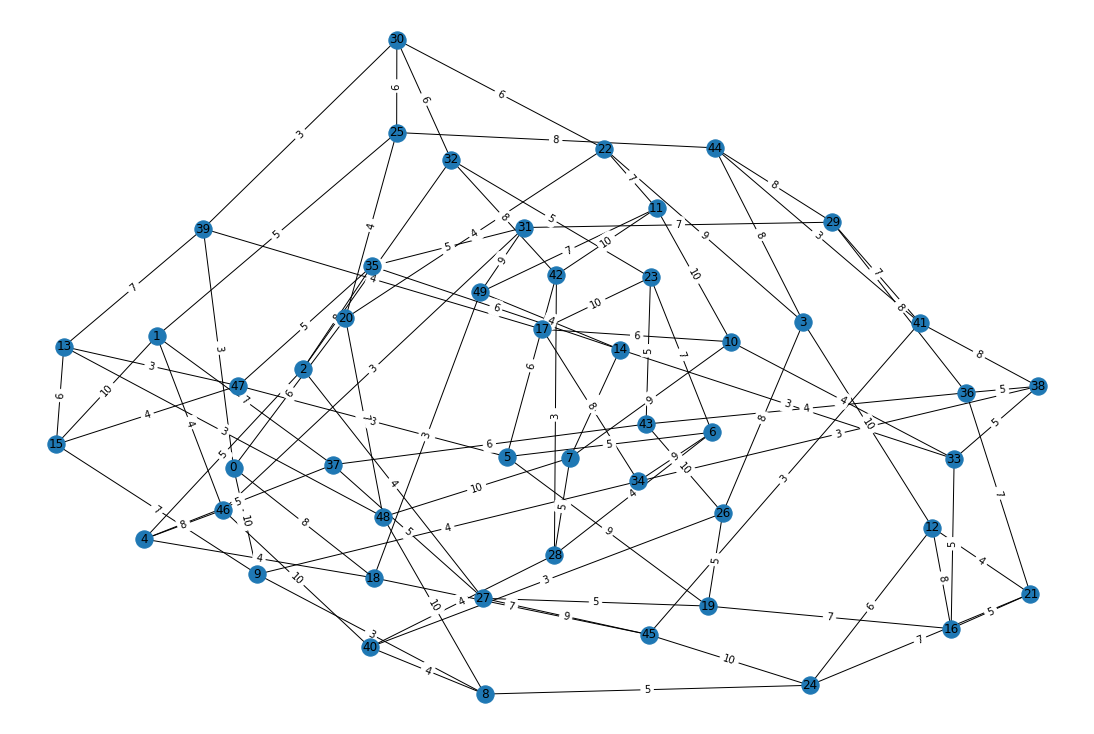

In [30]:
weight = nx.get_edge_attributes(G, "weight")
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G, seed=6)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G,pos,  edge_labels=weight)
plt.show()

In [31]:
spl=dict(nx.all_pairs_dijkstra_path_length(G))

dict_ecc = nx.eccentricity(G, sp=spl)

Периферийные вершины

In [32]:
nx.periphery(G, e=dict_ecc)

[21, 25]

Расстояние между перефирийными вершинами

In [33]:
diametr = nx.diameter(G, e=dict_ecc)
diametr

29

# ОДМВ

In [34]:
T = nx.minimum_spanning_tree(G)
edge_T = T.edges

Получим объект для определения расстояния между узлами

In [35]:
spl = dict(nx.all_pairs_dijkstra_path_length(G))
color_map = []
for edge in G.edges:
    if edge in edge_T:
        color_map.append('red')
    else: 
        color_map.append('blue')   

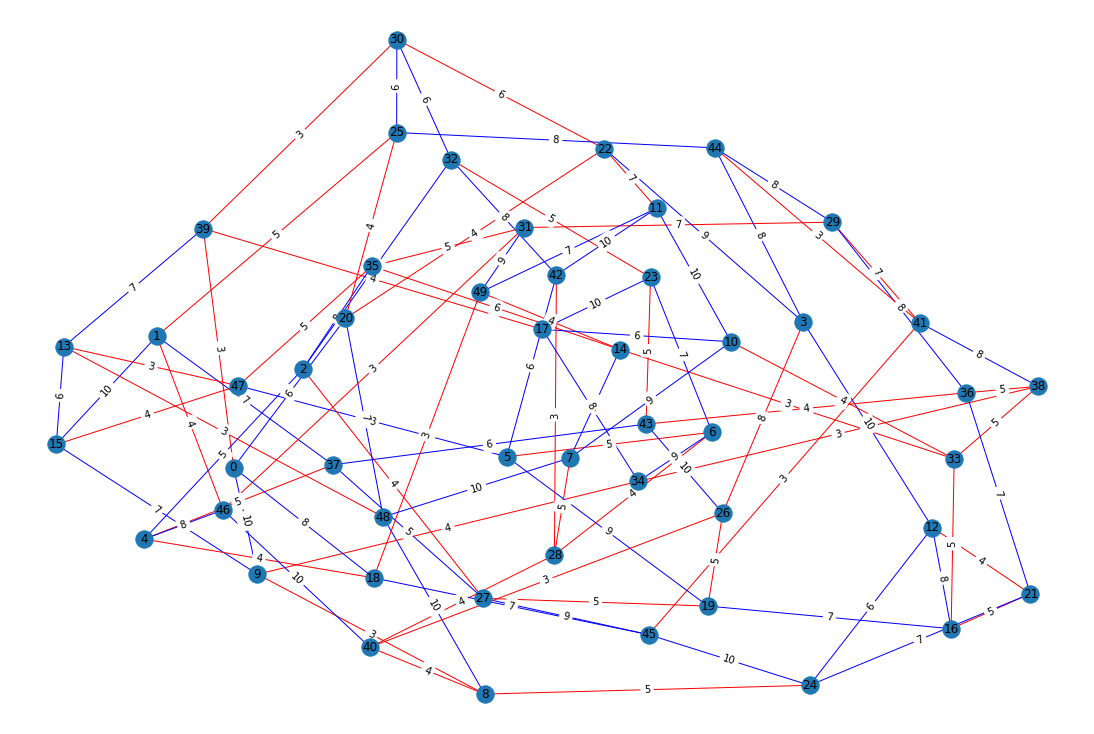

In [36]:
weight = nx.get_edge_attributes(G, "weight")
plt.figure(figsize=(15,10))
pos = nx.spring_layout(G, seed=6)
nx.draw(G, pos, with_labels=True, edge_color=color_map)
nx.draw_networkx_edge_labels(G, pos, edge_labels=weight)
plt.show()

Изменим веса трех рандомных ребер от 1 до 3 и посчитаем сумму ОДМВ по каждой итерации

In [37]:
x_cor = []
y_cor =[]

for i in range(10):
    copy_G = G.copy()
    random_edges = random.sample(list(copy_G.edges), 3)
    for u, v in random_edges:
        copy_G[u][v]['weight'] = random.randint(1,2)
        
    T = nx.minimum_spanning_tree(copy_G)
    edge_T = T.edges
    spl = dict(nx.all_pairs_dijkstra_path_length(copy_G))
    summ = 0
    for edge in copy_G.edges:
        if edge in edge_T:
            summ+=(spl[edge[0]][edge[1]])
    x_cor.append(i)
    y_cor.append(summ)


In [38]:
x_cor

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [39]:
y_cor

[201, 202, 201, 206, 203, 204, 202, 204, 203, 205]

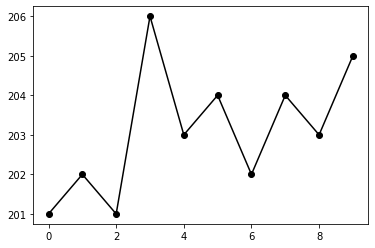

In [40]:
plt.plot(x_cor, y_cor, marker='o', color='black')